In [2]:
import pandas as pd
import numpy as np

train = pd.read_csv("C:/Users/HP/Projects/Medical Compliance Forecasting/Training Data.csv")

In [4]:
train.head(8)

,patient_id,Age,Gender,Prescription_period,Diabetes,Alcoholism,HyperTension,Smokes,Tuberculosis,Sms_Reminder,Adherence
0,1,19,M,7,0,0,0,0,0,0,No
1,2,24,F,59,0,0,0,0,0,0,No
2,3,4,F,43,0,0,0,0,0,0,No
3,4,38,M,66,0,0,0,0,0,1,No
4,5,46,F,98,0,0,0,0,0,1,No
5,6,20,F,73,0,0,0,0,0,0,No
6,7,51,F,102,1,0,1,0,0,1,No
7,8,58,F,96,0,0,1,0,0,1,No


# Exploratory Data Analysis

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180212 entries, 0 to 180211
Data columns (total 11 columns):
patient_id             180212 non-null int64
Age                    180212 non-null int64
Gender                 180212 non-null object
Prescription_period    180212 non-null int64
Diabetes               180212 non-null int64
Alcoholism             180212 non-null int64
HyperTension           180212 non-null int64
Smokes                 180212 non-null int64
Tuberculosis           180212 non-null int64
Sms_Reminder           180212 non-null int64
Adherence              180212 non-null object
dtypes: int64(9), object(2)
memory usage: 15.1+ MB


Info also tells about no missing values

In [6]:
train.describe()

,patient_id,Age,Prescription_period,Diabetes,Alcoholism,HyperTension,Smokes,Tuberculosis,Sms_Reminder
count,180212.000000,180212.000000,180212.000000,180212.000000,180212.000000,180212.000000,180212.000000,180212.000000,180212.000000
mean,90106.500000,37.795363,54.668485,0.078524,0.025043,0.216512,0.052566,0.000338,0.573968
std,52022.867693,22.852072,35.752491,0.268995,0.156255,0.411868,0.223166,0.018395,0.499824
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,45053.750000,19.000000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,90106.500000,38.000000,51.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,135159.250000,56.000000,86.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,180212.000000,113.000000,120.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


There is outliers in the Age

In [7]:
train.corr()

,patient_id,Age,Prescription_period,Diabetes,Alcoholism,HyperTension,Smokes,Tuberculosis,Sms_Reminder
patient_id,1.000000,0.000386,0.000724,0.000260,0.001969,0.003887,-0.003523,0.003778,0.002661
Age,0.000386,1.000000,0.061055,0.295050,0.071761,0.509416,0.090797,0.001300,-0.051713
Prescription_period,0.000724,0.061055,1.000000,0.017072,-0.015018,0.035913,-0.016020,-0.001677,0.001959
Diabetes,0.000260,0.295050,0.017072,1.000000,0.021997,0.423884,0.041240,0.004721,-0.031252
Alcoholism,0.001969,0.071761,-0.015018,0.021997,1.000000,0.068796,0.390472,0.045315,-0.017998
HyperTension,0.003887,0.509416,0.035913,0.423884,0.068796,1.000000,0.077154,-0.001617,-0.043751
Smokes,-0.003523,0.090797,-0.016020,0.041240,0.390472,0.077154,1.000000,0.021349,-0.011701
Tuberculosis,0.003778,0.001300,-0.001677,0.004721,0.045315,-0.001617,0.021349,1.000000,-0.006043
Sms_Reminder,0.002661,-0.051713,0.001959,-0.031252,-0.017998,-0.043751,-0.011701,-0.006043,1.000000


The correlation of Age to Hyper Tension is found to be high.

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

(array([166061.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  14151.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

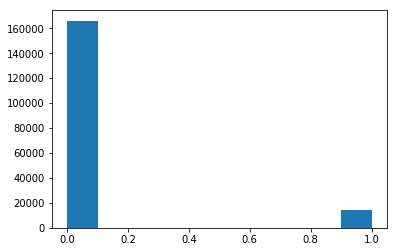

In [9]:
plt.hist(train['Diabetes'])

(array([175699.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,   4513.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

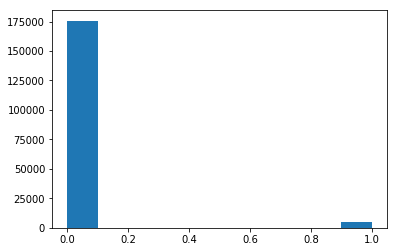

In [10]:
plt.hist(train['Alcoholism'])

(array([1.80151e+05, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 6.10000e+01]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

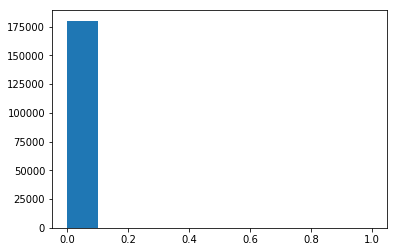

In [11]:
plt.hist(train['Tuberculosis'])

(array([141194.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  39018.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

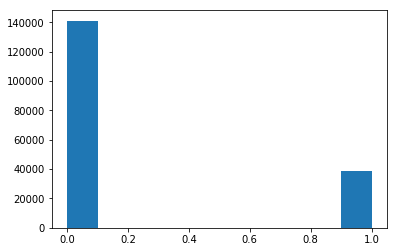

In [12]:
plt.hist(train['HyperTension'])

(array([170739.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,   9473.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

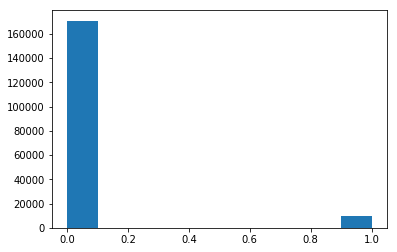

In [13]:
plt.hist(train['Smokes'])

(array([ 77253.,      0.,      0.,      0.,      0., 102482.,      0.,
             0.,      0.,    477.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

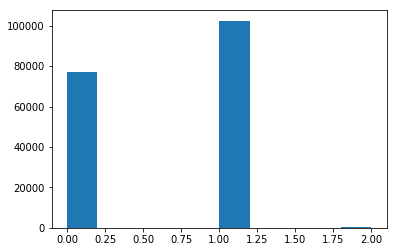

In [14]:
plt.hist(train['Sms_Reminder'])

In [15]:
print(len(train[train['Tuberculosis']==0]))
print()
print(len(train[train['Tuberculosis']==1]))

180151

61


Tuberculosis can be dropped

# Chi Square Test
Performing Chi Square Test in order to understand which of the 6 Categorical Variable is having less impact.

In [16]:
from scipy.stats import chisquare,chi2_contingency

In [17]:
def calcChiSquare(column1,column2):
    obs = pd.crosstab(column1,column2)
    c, p, dof, expected = chi2_contingency(obs)
    return p
        
p = calcChiSquare(train['Smokes'],train.Adherence)
print(p)
print()
p1 = calcChiSquare(train['Gender'],train.Adherence)
print(p1)
print()
p2 = calcChiSquare(train['Diabetes'],train.Adherence)
print(p2)
print()
p3 = calcChiSquare(train['Alcoholism'],train.Adherence)
print(p3)
print()
p4 = calcChiSquare(train['HyperTension'],train.Adherence)
print(p4)
print()
p5 = calcChiSquare(train['Sms_Reminder'],train.Adherence)
print(p5)
print()
p6 = calcChiSquare(train['Tuberculosis'],train.Adherence)
print(p6)

2.5950190473607418e-24

1.4356279583576108e-05

1.6514146425651428e-39

3.355367545408355e-26

2.768678691063962e-149

0.2196262295987882

0.38875547906974406


# Observation
Since Tuberculosis and Sms_Reminder have the highest values, they can be dropped further.

In [18]:
train1 = train.drop(['patient_id','Sms_Reminder','Tuberculosis'],axis =1)

In [19]:
train1.head()

,Age,Gender,Prescription_period,Diabetes,Alcoholism,HyperTension,Smokes,Adherence
0,19,M,7,0,0,0,0,No
1,24,F,59,0,0,0,0,No
2,4,F,43,0,0,0,0,No
3,38,M,66,0,0,0,0,No
4,46,F,98,0,0,0,0,No


Since Gender and Adherence are categorical variable so they have to be converted into a numerical value. Label Encoder has been used for this purpose. It has assigned 1 for Male and 0 for Female.

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [21]:
le.fit(train1.Gender)
train1.loc[:,'Gender'] = le.transform(train1.Gender)

In [22]:
le.fit(train1.Adherence)
train1.loc[:,'Adherence'] = le.transform(train1.Adherence)

In [23]:
train1.head()

,Age,Gender,Prescription_period,Diabetes,Alcoholism,HyperTension,Smokes,Adherence
0,19,1,7,0,0,0,0,0
1,24,0,59,0,0,0,0,0
2,4,0,43,0,0,0,0,0
3,38,1,66,0,0,0,0,0
4,46,0,98,0,0,0,0,0


# Creating Feature

In [25]:
feature = train1.drop(["Adherence"],axis =1)

In [26]:
feature.head()

,Age,Gender,Prescription_period,Diabetes,Alcoholism,HyperTension,Smokes
0,19,1,7,0,0,0,0
1,24,0,59,0,0,0,0
2,4,0,43,0,0,0,0
3,38,1,66,0,0,0,0
4,46,0,98,0,0,0,0


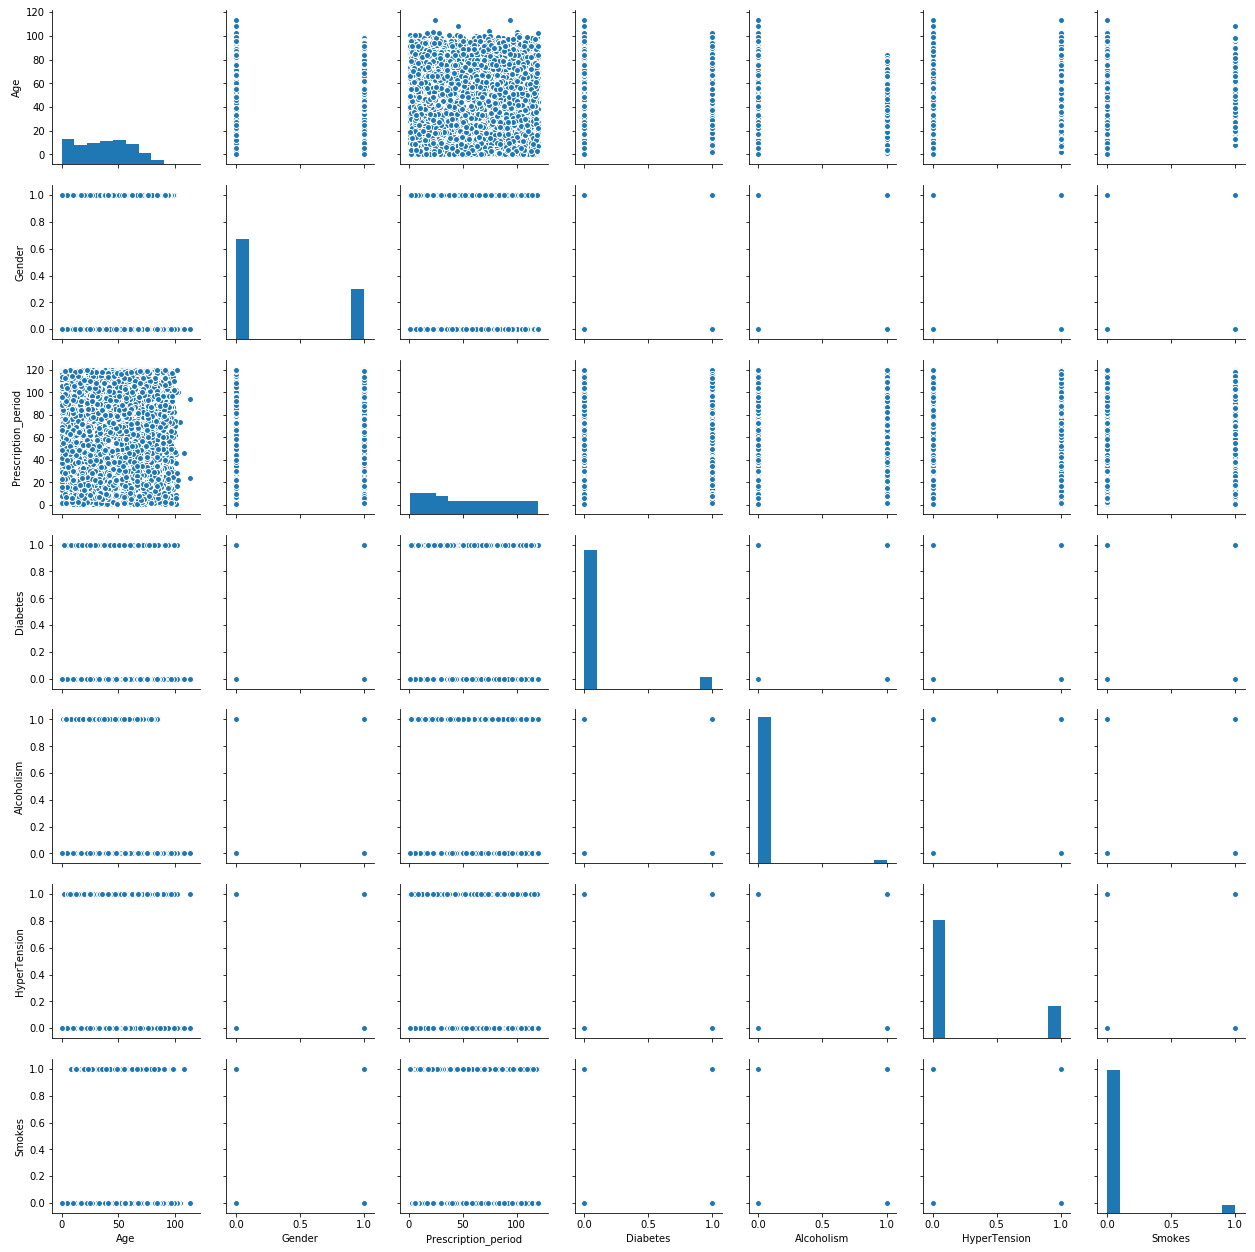

In [70]:
sns.pairplot(feature)

# Building Model - Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
clas = LogisticRegression(random_state=0)

In [28]:
result = clas.fit(feature, train1['Adherence'])
result

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

# Test Data

In [29]:
test_data = pd.read_csv("C:/Users/HP/Projects/Medical Compliance Forecasting/Training Data.csv")
test_data.head()

,patient_id,Age,Gender,Prescription_period,Diabetes,Alcoholism,HyperTension,Smokes,Tuberculosis,Sms_Reminder,Adherence
0,1,19,M,7,0,0,0,0,0,0,No
1,2,24,F,59,0,0,0,0,0,0,No
2,3,4,F,43,0,0,0,0,0,0,No
3,4,38,M,66,0,0,0,0,0,1,No
4,5,46,F,98,0,0,0,0,0,1,No


In [30]:
le.fit(test_data.Gender)
test_data.loc[:,'Gender'] = le.transform(test_data.Gender)

In [31]:
le.fit(test_data.Adherence)
test_data.loc[:,'Adherence'] = le.transform(test_data.Adherence)

In [32]:
test = test_data.drop(['patient_id','Tuberculosis','Sms_Reminder','Adherence'],axis =1)

# Making Predictions and Calculating Probability

In [33]:
y_predict = clas.predict(test)
y_predict

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [34]:
clas.predict_proba(test)

array([[0.1752965 , 0.8247035 ],
       [0.878789  , 0.121211  ],
       [0.67408035, 0.32591965],
       ...,
       [0.42539073, 0.57460927],
       [0.9923409 , 0.0076591 ],
       [0.98636068, 0.01363932]])

In [35]:
import warnings
warnings.filterwarnings("ignore")

In [36]:
from sklearn import model_selection
from sklearn import metrics, cross_validation

kfold = model_selection.KFold(n_splits=10, random_state=7)
clas = LogisticRegression() 
scoring = 'precision'
final_result = model_selection.cross_val_score(clas, feature, train1['Adherence'], cv=10, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (final_result.mean()))

10-fold cross validation average accuracy: 0.790


In [37]:
kfold = model_selection.KFold(n_splits=10, random_state=7)
scoring = 'recall'
final_result = model_selection.cross_val_score(clas, feature, train1['Adherence'], cv=10, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (final_result.mean()))

10-fold cross validation average accuracy: 0.823


# Cross Validation for Precision and Recall - Random Forest Classifier

In [38]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=14, max_depth=5)

In [53]:
results1 = clf.fit(feature, train1['Adherence'])
results1

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=14, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [54]:
y_pred = clf.predict(test)

In [55]:
prob = clf.predict_proba(test)

In [56]:
from sklearn import model_selection
from sklearn import metrics, cross_validation

kfold = model_selection.KFold(n_splits=10, random_state=7)
clf = RandomForestClassifier(n_estimators=14, max_depth=5) 
scoring = 'precision'
final_result = model_selection.cross_val_score(clf, feature, train1['Adherence'], cv=10, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (final_result.mean()))

10-fold cross validation average accuracy: 0.782


In [57]:
kfold = model_selection.KFold(n_splits=10, random_state=7)
clf = RandomForestClassifier(n_estimators=14, max_depth=5) 
scoring = 'recall'
final_result = model_selection.cross_val_score(clf, feature, train1['Adherence'], cv=10, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (final_result.mean()))

10-fold cross validation average accuracy: 0.894


Cross Validation Observations

After 10-fold cross validation with Logistic Regression, the score for Precision and Recall was 0.790 and 0.823 respectively while with Random Forest Classifier, the score for Precision and Recall was 0.783 and 0.901 respectively. The score for Precision is almost same while for Recall has improved a lot. So continued with Random Forest Classifier.


In [58]:
y_pred = pd.DataFrame(y_pred)

In [59]:
y_pred.head(2)

,0
0,1
1,0


In [60]:
prob_df = pd.DataFrame(prob)
prob_df.head()

,0,1
0,0.287152,0.712848
1,0.885261,0.114739
2,0.888170,0.111830
3,0.885424,0.114576
4,0.898173,0.101827


In [61]:
Probability = prob_df[0]

# Confusion Matrix
The function for confusion matrix has been written and called. Since, the actual value of adherence is not known so there is no output for the same.

In the function, Recall and Precision for both Yes and No has been calculated.

In [62]:
from sklearn.metrics import confusion_matrix

In [63]:
def confusion_matrix_(actual,y_pred):
    matrix = confusion_matrix(actual,y_pred)
    recall_for_yes = matrix[0][0] / (matrix[0][0]+ matrix[1][0])
    recall_for_no = matrix[1][1] / (matrix[0][1] + matrix[1][1])
    precision_for_yes = matrix[0][0]/ (matrix[0][0]+ matrix[0][1])
    precision_for_no = matrix[1][1] / (matrix[1][0] + matrix[1][1])
    
    return recall_for_yes,recall_for_no,precision_for_yes,precision_for_no

In [64]:
confusion_matrix_(actual, y_pred)   #supply the target value of Test_Data.Adherence in place of actual

Checking all shape before writing the CSV file to avoid any mistake.

In [65]:
Probability.shape

(180212,)

In [66]:
y_pred.shape

(180212, 1)

In [67]:
test_data['patient_id'].shape

(180212,)

In [68]:
Answer = pd.concat([test_data['patient_id'] ,y_pred,Probability],axis =1)
Answer.columns = ['Patient_id','Adherence','Probability']

In [69]:
Answer.to_csv('MedCompFor.csv', index = False)